In [1]:


import numpy as np
import pandas as pd

import cv2
import glob
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

C:\Users\Ashish Sugunan\AppData\Local\Temp\ipykernel_14156\267403632.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Get the images from the dataset and preprocess

In [2]:
def get_and_preprocess(path):
    normal = glob.glob(f'{path}/NORMAL/*')
    pneumonia = glob.glob(f'{path}/PNEUMONIA/*')
    X = []
    y = []
    for i in normal:
        image = cv2.imread(i,0)
        image = cv2.resize(image, (128, 128))
        image = image/255
        image = np.expand_dims(image, axis=-1)  # Add a channel dimension
        X.append(image)
        y.append(0)  #0 for normal
    for i in pneumonia:
        image = cv2.imread(i,0)
        image = cv2.resize(image, (128,128))
        image = image/255
        image = np.expand_dims(image, axis=-1)  # Add a channel dimension
        X.append(image)
        y.append(1)  #1 for pneumonia
    
    return X,y

In [3]:
X_train, y_train = get_and_preprocess('C:\\Users\\Ashish Sugunan\\OneDrive\\Desktop\\mini-project\\archive (1)\\chest_xray\\chest_xray\\train')
X_val, y_val = get_and_preprocess('C:\\Users\\Ashish Sugunan\\OneDrive\\Desktop\\mini-project\\archive (1)\\chest_xray\\chest_xray\\val')
X_test, y_test = get_and_preprocess('C:\\Users\\Ashish Sugunan\\OneDrive\\Desktop\\mini-project\\archive (1)\\chest_xray\\chest_xray\\test')


In [4]:
len(X_train)

5216

In [5]:
print(y_train.count(0))
print(y_train.count(1))

1341
3875


### Visualization of images

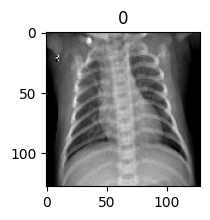

In [6]:
plt.figure(figsize=(2, 2))

# Check the length of X_train and y_train
data_length = len(X_train)

# Make sure the index is within the valid range
index_to_display = 22
if index_to_display < data_length:
    plt.imshow(X_train[index_to_display], cmap='gray')
    plt.title(str(y_train[index_to_display]))
    plt.show()
else:
    print(f"Invalid index: {index_to_display}. Dataset length is {data_length}.")



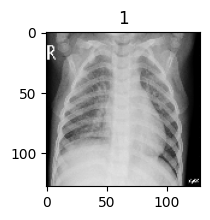

In [7]:
plt.figure(figsize=(2, 2))

# Check the length of X_train and y_train
data_length = len(X_train)

# Specify the index to display
index_to_display = 1564

# Make sure the index is within the valid range
if 0 <= index_to_display < data_length:
    plt.imshow(X_train[index_to_display], cmap='gray')
    plt.title(str(y_train[index_to_display]))
    plt.show()
else:
    print(f"Invalid index: {index_to_display}. Dataset length is {data_length}.")


### Model Building

In [8]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

In [9]:
print("Length of X_train:", len(X_train))

if len(X_train) > 0:
    print("Shape of the first element in X_train:", X_train[0].shape)
else:
    print("X_train is empty.")


Length of X_train: 5216
Shape of the first element in X_train: (128, 128, 1)


In [10]:
y_train = to_categorical(y_train,num_classes=2)
y_val = to_categorical(y_val,num_classes=2)
y_test = to_categorical(y_test,num_classes=2)

In [11]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [12]:
model = Sequential()
model.add(Conv2D(128,(4,4),padding='same',activation='relu',input_shape=(128,128,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(8,(4,4),padding='same',activation='relu',input_shape=(128,128,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(4,4),padding='same',activation='relu',input_shape=(128,128,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(128,128,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(8,(3,3),padding='same',activation='relu',input_shape=(128,128,1)))
model.add(MaxPool2D((2,2)))

model.add(Dropout(rate=0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(2,activation='softmax'))

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',tf.metrics.Precision(name='precision')])

In [14]:
# Check the shapes of your data before fitting
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Check if data is non-empty
if X_train.size == 0 or y_train.size == 0:
    print("Error: Input data is empty.")
else:
    # Train the model
    model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Shape of X_train: (5216, 128, 128, 1)
Shape of y_train: (5216, 2)
Epoch 1/10


163/163 [==============================] - 58s 341ms/step - loss: 0.5491 - accuracy: 0.7487 - precision: 0.7487 - val_loss: 0.7208 - val_accuracy: 0.6250 - val_precision: 0.6250
Epoch 2/10
163/163 [==============================] - 55s 337ms/step - loss: 0.2622 - accuracy: 0.8867 - precision: 0.8867 - val_loss: 1.3280 - val_accuracy: 0.6250 - val_precision: 0.6250
Epoch 3/10
163/163 [==============================] - 53s 327ms/step - loss: 0.1470 - accuracy: 0.9431 - precision: 0.9431 - val_loss: 0.4444 - val_accuracy: 0.8125 - val_precision: 0.8125
Epoch 4/10
163/163 [==============================] - 62s 382ms/step - loss: 0.1227 - accuracy: 0.9548 - precision: 0.9548 - val_loss: 0.8424 - val_accuracy: 0.6250 - val_precision: 0.6250
Epoch 5/10
163/163 [==============================] - 88s 541ms/step - loss: 0.1022 - accuracy: 0.9626 - precision: 0.9626 - val_loss: 0.7482 - val_accuracy: 0.6250 - val_preci

In [15]:
# Assuming you have compiled your model before training
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print shapes and sizes for debugging
print("Shape of X_test:", X_test.shape)
print("Size of X_test:", X_test.size)
print("Shape of y_test:", y_test.shape)
print("Size of y_test:", y_test.size)

# Check if data is non-empty
if X_test.size > 0 and y_test.size > 0:
    # Evaluate the model on the test set
    evaluation_result = model.evaluate(X_test, y_test)

    # Print the evaluation result
    print("Test Loss:", evaluation_result[0])
    print("Test Accuracy:", evaluation_result[1])
else:
    print("Error: Input data is empty.")



Shape of X_test: (624, 128, 128, 1)
Size of X_test: 10223616
Shape of y_test: (624, 2)
Size of y_test: 1248
20/20 [==============================] - 4s 180ms/step - loss: 1.2792 - accuracy: 0.7708 - precision: 0.7708
Test Loss: 1.2792481184005737
Test Accuracy: 0.7708333134651184


In [16]:
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
preds = model.predict(X_test)
y_pred = np.argmax(preds,axis=1)
y_test = np.argmax(y_test,axis=1)




20/20 [==============================] - 3s 143ms/step


In [18]:

preds = model.predict(X_test)
y_pred = np.argmax(preds, axis=1)


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


20/20 [==============================] - 3s 152ms/step
[[ 95 139]
 [  4 386]]


In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.41      0.57       234
           1       0.74      0.99      0.84       390

    accuracy                           0.77       624
   macro avg       0.85      0.70      0.71       624
weighted avg       0.82      0.77      0.74       624



In [20]:
model.save('pneumonia.h5')

c:\Users\Ashish Sugunan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
def predict_image(img_path):
    img = cv2.imread(img_path, 0)
    img = cv2.resize(img, (128, 128))
    img = img / 255
    img = np.expand_dims(img, axis=-1)
    img = img.reshape((1,) + img.shape)
    return img

image_path = 'C:\\Users\\Ashish Sugunan\\OneDrive\\Desktop\\mini-project\\archive (1)\\chest_xray\\chest_xray\\test\\PNEUMONIA\\person100_bacteria_482.jpeg'
image = predict_image(image_path)

pred = np.argmax(model.predict(image), axis=1)
if pred == 0:
    print("NORMAL")
else:
    print("PNEUMONIA")

1/1 [==============================] - 0s 81ms/step
PNEUMONIA


In [22]:
def predict_image(img_path):
    img = cv2.imread(img_path, 0)
    img = cv2.resize(img, (128, 128))
    img = img / 255
    img = np.expand_dims(img, axis=-1)
    img = img.reshape((1,) + img.shape)
    return img

image_path = 'C:\\Users\\Ashish Sugunan\\OneDrive\\Desktop\\mini-project\\xray buttockss.jpeg'
image = predict_image(image_path)

pred = np.argmax(model.predict(image), axis=1)
if pred == 0:
    print("NORMAL")
else:
    print("PNEUMONIA")

1/1 [==============================] - 0s 87ms/step
NORMAL


In [23]:
from sklearn.metrics import confusion_matrix

# Assuming 'y_test' is the true labels and 'y_pred' is the predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)
# Calculate and print other evaluation metrics
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)
precision = conf_matrix[1, 1] / (conf_matrix[0, 1] + conf_matrix[1, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
f1_score = 2 * (precision * recall) / (precision + recall)

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Alternatively, you can use scikit-learn's classification_report for a comprehensive report
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[ 95 139]
 [  4 386]]

Accuracy: 0.7708333333333334
Precision: 0.7352380952380952
Recall: 0.9897435897435898
F1 Score: 0.8437158469945355

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.41      0.57       234
           1       0.74      0.99      0.84       390

    accuracy                           0.77       624
   macro avg       0.85      0.70      0.71       624
weighted avg       0.82      0.77      0.74       624



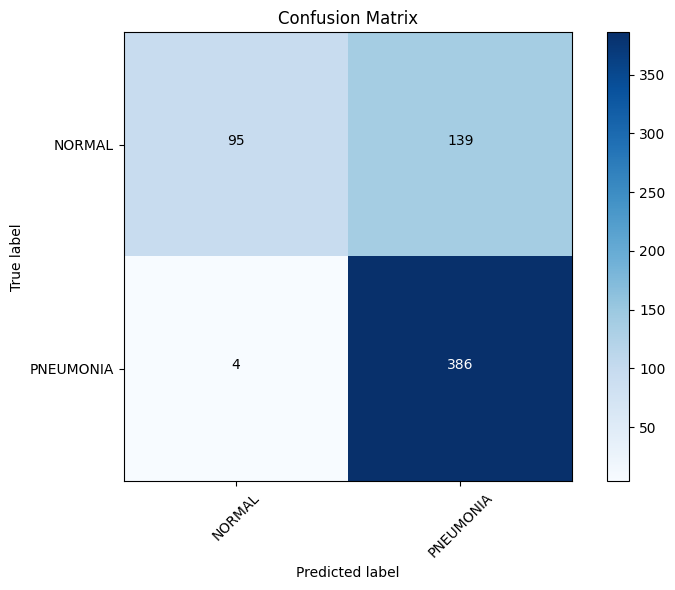


Accuracy: 77.08333333333334 %
Precision: 73.52380952380952 %
Recall: 98.97435897435898 %
F1 Score: 84.37158469945355 %


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Assuming 'y_test' is the true labels and 'y_pred' is the predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Define class labels
class_names = ['NORMAL', 'PNEUMONIA']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Display values in each cell
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Show plot
plt.show()

# Calculate and print performance metrics
accuracy = np.trace(conf_matrix) / float(np.sum(conf_matrix))
precision = conf_matrix[1, 1] / (conf_matrix[0, 1] + conf_matrix[1, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
f1_score = 2 * (precision * recall) / (precision + recall)

print("\nAccuracy:", accuracy * 100, "%")
print("Precision:", precision * 100, "%")
print("Recall:", recall * 100, "%")
print("F1 Score:", f1_score * 100, "%")

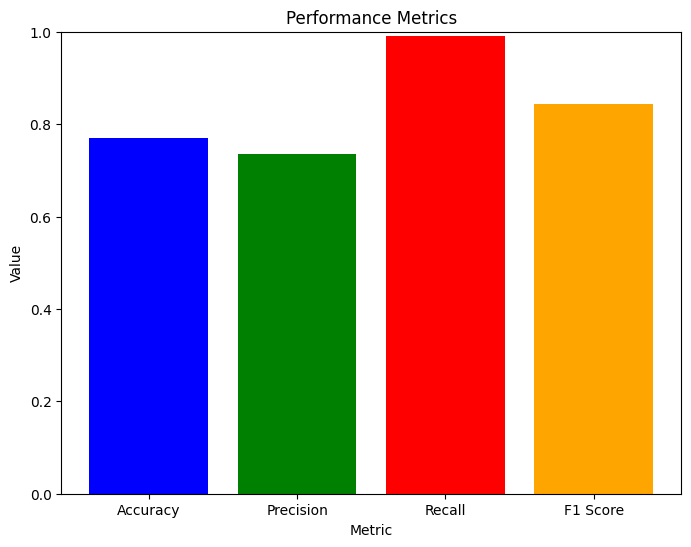

In [25]:
import matplotlib.pyplot as plt

# Define performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1_score]

# Plot performance metrics
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'orange'])
plt.title('Performance Metrics')
plt.ylabel('Value')
plt.xlabel('Metric')
plt.ylim(0, 1)  # Set y-axis limits to 0 and 1 for better visualization of percentage values
plt.show()

In [1]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from concurrent.futures import ThreadPoolExecutor

# Initialize Tkinter application
app = tk.Tk()
app.title("Pneumonia Detection")

# Load the trained model (load it once outside the function)
model = load_model('pneumonia.h5')

# Function to preprocess the image
def preprocess_image(image):
    image = cv2.resize(image, (128, 128))
    image = image / 255
    image = np.expand_dims(image, axis=-1)
    image = np.expand_dims(image, axis=0)
    return image

# Function to classify the image
def classify_image(image):
    image = preprocess_image(image)
    pred = np.argmax(model.predict(image), axis=1)
    return "NORMAL" if pred == 0 else "PNEUMONIA"

# Function to open file dialog and display selected image
def open_file_dialog():
    file_path = filedialog.askopenfilename()
    if file_path:
        with ThreadPoolExecutor() as executor:
            image = executor.submit(cv2.imread, file_path)
            image = image.result()
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying in Tkinter
            image = Image.fromarray(image)
            image = image.resize((200, 200), Image.ANTIALIAS)
            photo = ImageTk.PhotoImage(image)
            image_label.config(image=photo)
            image_label.image = photo
            prediction = executor.submit(classify_image, image)
            prediction = prediction.result()
            result_label.config(text=prediction)

# Create and position widgets
select_button = tk.Button(app, text="Select Image", command=open_file_dialog)
select_button.pack(pady=10)

image_label = tk.Label(app)
image_label.pack(pady=10)

result_label = tk.Label(app, font=('Helvetica', 16))
result_label.pack(pady=10)

# Run the Tkinter app
app.mainloop()
